In [1]:
! pip install kaggle

In [2]:
import pandas as pd
import json

! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
! kaggle datasets download -d emmarex/plantdisease

Dataset URL: https://www.kaggle.com/datasets/emmarex/plantdisease
License(s): unknown
 97% 641M/658M [00:12<00:00, 48.0MB/s]
100% 658M/658M [00:12<00:00, 55.4MB/s]


In [4]:
from zipfile import ZipFile
file_name = "/content/plantdisease.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [5]:
! pip install tensorflow keras numpy pandas scikit-learn matplotlib flask flask-mysql


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 3.5 MB/s eta 0:00:00


In [6]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [7]:
# Set dataset directory
dataset_dir = '/content/PlantVillage'

In [8]:
# Initialize image data generator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [9]:
# Load data
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.


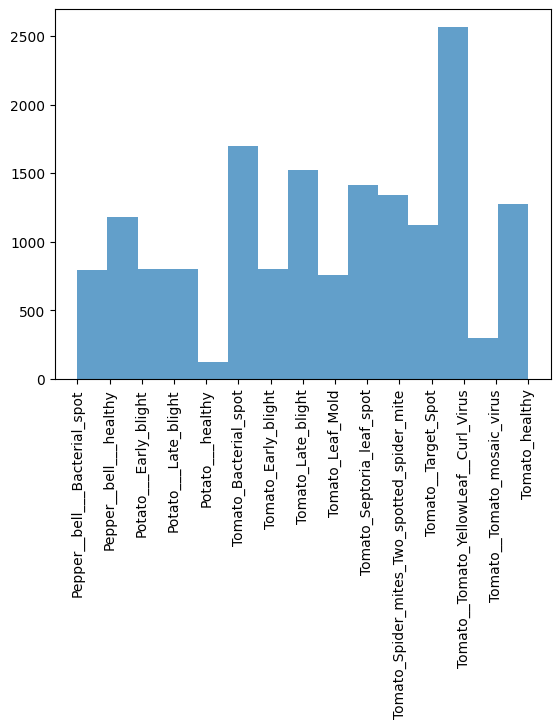

In [10]:
import matplotlib.pyplot as plt
classes = list(train_generator.class_indices.keys())
class_count = train_generator.classes
plt.hist(class_count, bins=len(classes), alpha=0.7)
plt.xticks(range(len(classes)), classes, rotation=90)
plt.show()


In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(classes), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │           1,935 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,306,575 (12.61 MB)

 Trainable params: 3,306,575 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    callbacks=[early_stopping]
)



Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


517/517 ━━━━━━━━━━━━━━━━━━━━ 641s 1s/step - accuracy: 0.3498 - loss: 2.0145 - val_accuracy: 0.7407 - val_loss: 0.8386
Epoch 2/20
517/517 ━━━━━━━━━━━━━━━━━━━━ 668s 1s/step - accuracy: 0.6837 - loss: 0.9625 - val_accuracy: 0.7797 - val_loss: 0.6250
Epoch 3/20
517/517 ━━━━━━━━━━━━━━━━━━━━ 649s 1s/step - accuracy: 0.7482 - loss: 0.7445 - val_accuracy: 0.8435 - val_loss: 0.4776
Epoch 4/20
517/517 ━━━━━━━━━━━━━━━━━━━━ 618s 1s/step - accuracy: 0.7906 - loss: 0.6064 - val_accuracy: 0.8634 - val_loss: 0.4103
Epoch 5/20
517/517 ━━━━━━━━━━━━━━━━━━━━ 610s 1s/step - accuracy: 0.8231 - loss: 0.5232 - val_accuracy: 0.8799 - val_loss: 0.3515
Epoch 6/20
517/517 ━━━━━━━━━━━━━━━━━━━━ 601s 1s/step - accuracy: 0.8457 - loss: 0.4382 - val_accuracy: 0.9049 - val_loss: 0.2880
Epoch 7/20
517/517 ━━━━━━━━━━━━━━━━━━━━ 609s 1s/step - accuracy: 0.8696 - loss: 0.3873 - val_accuracy: 0.8806 - val_loss: 0.3641
Epoch 8/20
517/517 ━━━━━━━━━━━━━━━━━━━━ 607s 1s/step - accuracy: 0.8764 - loss: 0.3451 - val_accuracy: 0.900

In [13]:
# Save the model
model.save('plant_disease_model.keras')


In [14]:
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")


129/129 ━━━━━━━━━━━━━━━━━━━━ 46s 356ms/step - accuracy: 0.9183 - loss: 0.3313
Validation Accuracy: 92.41%


In [18]:
from google.colab import files
files.download('plant_disease_model.keras')
/content/PlantVillage/Pepper__bell___Bacterial_spot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>